In [1]:
import numpy as np
import scipy.io
import pandas as pd
import librosa
import dataclasses
import os
from typing import Tuple
from mne.decoding import CSP

In [2]:
SR_EEG = 64
SR_AUDIO = 16000
SR_DS_AUDIO=64
TOTAL_TIME=50
T_SPAN = 5
N_CH = 66
CSP_DIM=64
UNPROCESSED = True

OV=1
STEP_SIZE_EEG = int(SR_EEG*T_SPAN*OV)
STEP_SIZE_AUDIO = int(SR_AUDIO*T_SPAN*OV)
for subject in range(1,19):
# subject =2
    try:
        base_path ="/home/alialavi/datasets/eeg_den"

        n_sects = int(50 // T_SPAN)
        fn_chan = os.path.join(base_path,'data/chan.mat' )
        f_chan_names = scipy.io.loadmat(fn_chan)
        ch_names = []
        for i in range(64):
            ch_names.append(f_chan_names['x'][i, 0][0])

        if UNPROCESSED:
            fn_eeg = os.path.join(base_path, f'data/DATA_preproc/S{subject}_data_preproc.mat')
            f_eeg = scipy.io.loadmat(fn_eeg)

            fsample_eeg = f_eeg['data']['fsample'][0][0][0][0][0][0][0]
            n_data = len(f_eeg['data']['eeg'][0, 0][0])
            eeg = f_eeg['data']['eeg'][0, 0]
        else:
            raise ValueError('Processed data unspecified.')

        fn_expinfo = os.path.join(base_path, f'data/EEG/s{subject}_expinfo.txt')
        expinfo = pd.read_csv(fn_expinfo, delimiter=' ')
        expinfo = expinfo[expinfo['n_speakers'] == 2].reset_index()

        eeg_shape = np.asarray(eeg[0,:]).shape
        #eeg_all shape: samples, channels, times
        sh = eeg[0, 1].shape
        eeg_all = np.zeros((eeg.shape[1], *sh), dtype=np.float32)
        for i in range(eeg[0, :].shape[0]):
            eeg_all[i, ...] = eeg[0, i]
        eeg_all = eeg_all.transpose(0, 2, 1) #sample, channel, time
        print(f'eeg_all shape: {eeg_all.shape}')
        n_sects = int((TOTAL_TIME - (1 - OV) * T_SPAN) // (OV*T_SPAN))

        eeg_all_reshaped = np.zeros((n_data*n_sects,eeg_all.shape[1],T_SPAN*SR_EEG), dtype=np.float32)
        for curr_data in range(n_data):
            for curr_sect in range(n_sects):
                curr_ind = curr_data*n_sects+curr_sect
                eeg_all_reshaped[curr_ind,:,:] = eeg_all[curr_data, :, curr_sect*STEP_SIZE_EEG: curr_sect*STEP_SIZE_EEG+T_SPAN*SR_EEG]

        event_mf_all = np.asarray(expinfo['attend_mf']).reshape(-1) - 1
        events_mf_all_reshaped = np.repeat(event_mf_all, n_sects)
        csp = CSP(n_components=CSP_DIM, reg=None, log=False, norm_trace=False)
        eeg_all_csp_avg_reshaped = csp.fit_transform(eeg_all_reshaped.astype(np.float64), events_mf_all_reshaped)
    except Exception as e:
        print(f'Subject {subject}')
        print(e)

eeg_all shape: (60, 66, 3200)
Computing rank from data with rank=None
    Using tolerance 2.2e+02 (2.2e-16 eps * 66 dim * 1.5e+16  max singular value)
    Estimated rank (mag): 66
    MAG: rank 66 computed from 66 data channels with 0 projectors
Reducing data rank from 66 -> 66
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 1e+03 (2.2e-16 eps * 66 dim * 6.8e+16  max singular value)
    Estimated rank (mag): 66
    MAG: rank 66 computed from 66 data channels with 0 projectors
Reducing data rank from 66 -> 66
Estimating covariance using EMPIRICAL
Done.
eeg_all shape: (60, 66, 3200)
Computing rank from data with rank=None
    Using tolerance 6e+02 (2.2e-16 eps * 66 dim * 4.1e+16  max singular value)
    Estimated rank (mag): 66
    MAG: rank 66 computed from 66 data channels with 0 projectors
Reducing data rank from 66 -> 66
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 8.3e+

In [2]:
SR_EEG = 64
SR_AUDIO = 16000
SR_DS_AUDIO=64
TOTAL_TIME=50
T_SPAN = 5
N_CH = 66
CSP_DIM=64
UNPROCESSED = True

OV=1
STEP_SIZE_EEG = int(SR_EEG*T_SPAN*OV)
STEP_SIZE_AUDIO = int(SR_AUDIO*T_SPAN*OV)

subject =2

base_path ="/home/alialavi/datasets/eeg_den"

n_sects = int(50 // T_SPAN)
fn_chan = os.path.join(base_path,'data/chan.mat' )
f_chan_names = scipy.io.loadmat(fn_chan)
ch_names = []
for i in range(64):
    ch_names.append(f_chan_names['x'][i, 0][0])

if UNPROCESSED:
    fn_eeg = os.path.join(base_path, f'data/DATA_preproc/S{subject}_data_preproc.mat')
    f_eeg = scipy.io.loadmat(fn_eeg)

    fsample_eeg = f_eeg['data']['fsample'][0][0][0][0][0][0][0]
    n_data = len(f_eeg['data']['eeg'][0, 0][0])
    eeg = f_eeg['data']['eeg'][0, 0]
else:
    raise ValueError('Processed data unspecified.')

fn_expinfo = os.path.join(base_path, f'data/EEG/s{subject}_expinfo.txt')
expinfo = pd.read_csv(fn_expinfo, delimiter=' ')
expinfo = expinfo[expinfo['n_speakers'] == 2].reset_index()

eeg_shape = np.asarray(eeg[0,:]).shape
#eeg_all shape: samples, channels, times
sh = eeg[0, 1].shape
eeg_all = np.zeros((eeg.shape[1], *sh), dtype=np.float32)
for i in range(eeg[0, :].shape[0]):
    eeg_all[i, ...] = eeg[0, i]
eeg_all = eeg_all.transpose(0, 2, 1) #sample, channel, time
print(f'eeg_all shape: {eeg_all.shape}')
n_sects = int((TOTAL_TIME - (1 - OV) * T_SPAN) // (OV*T_SPAN))

eeg_all_reshaped = np.zeros((n_data*n_sects,eeg_all.shape[1],T_SPAN*SR_EEG), dtype=np.float32)
for curr_data in range(n_data):
    for curr_sect in range(n_sects):
        curr_ind = curr_data*n_sects+curr_sect
        eeg_all_reshaped[curr_ind,:,:] = eeg_all[curr_data, :, curr_sect*STEP_SIZE_EEG: curr_sect*STEP_SIZE_EEG+T_SPAN*SR_EEG]

        
eeg_all_reshaped += np.random.normal(0,0.01)
event_mf_all = np.asarray(expinfo['attend_mf']).reshape(-1) - 1
events_mf_all_reshaped = np.repeat(event_mf_all, n_sects)
csp = CSP(n_components=CSP_DIM, reg=None, log=False, norm_trace=False)
eeg_all_csp_avg_reshaped = csp.fit_transform(eeg_all_reshaped.astype(np.float64), events_mf_all_reshaped)

eeg_all shape: (60, 66, 3200)
Computing rank from data with rank=None
    Using tolerance 6e+02 (2.2e-16 eps * 66 dim * 4.1e+16  max singular value)
    Estimated rank (mag): 66
    MAG: rank 66 computed from 66 data channels with 0 projectors
Reducing data rank from 66 -> 66
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 8.3e+02 (2.2e-16 eps * 66 dim * 5.7e+16  max singular value)
    Estimated rank (mag): 66
    MAG: rank 66 computed from 66 data channels with 0 projectors
Reducing data rank from 66 -> 66
Estimating covariance using EMPIRICAL
Done.


In [4]:
eeg_all_reshaped

array([[[-2.91078835e+01, -4.15659180e+01, -3.77676849e+01, ...,
          1.30319042e+01, -5.24203110e+00, -1.52729979e+01],
        [-2.81608181e+01, -4.07398567e+01, -3.59088211e+01, ...,
          5.43832445e+00, -1.02119131e+01, -1.97554474e+01],
        [-2.69774747e+00, -3.33099389e+00, -6.53852987e+00, ...,
         -1.18268633e+00, -1.35350466e-01,  1.54400975e-01],
        ...,
        [-9.83904934e+00, -4.13176250e+00, -3.09159088e+00, ...,
          5.80977631e+00,  8.54295921e+00,  9.39201069e+00],
        [ 3.05494261e+00,  6.10927916e+00,  1.03157263e+01, ...,
          7.72629023e+00,  8.55632687e+00,  4.30075598e+00],
        [ 1.08053236e+01,  6.82778788e+00,  1.17798357e+01, ...,
          7.85030174e+00,  6.97118425e+00,  9.33035278e+00]],

       [[-1.64753628e+01, -1.37820826e+01, -7.08265448e+00, ...,
          8.26652451e+01,  9.32476501e+01,  9.06263351e+01],
        [-2.14117966e+01, -1.96245670e+01, -1.18819141e+01, ...,
          8.69875107e+01,  9.67523041e

In [3]:
import pickle
import os

fp =os.path.join('logs','history', 'arch3','val_acc_sbj_0.pkl')
with open(fp, "rb") as pickle_file:
    dic_0 = pickle.load(pickle_file)

fp =os.path.join('logs','history', 'arch3', 'val_acc_sbj_1.pkl')
with open(fp, "rb") as pickle_file:
    dic_1 = pickle.load(pickle_file)
    
# fp =os.path.join('logs','history', 'val_acc_sbj_2.pkl')
# with open(fp, "rb") as pickle_file:
#     dic_2 = pickle.load(pickle_file)    

In [4]:
dic_0.update(dic_1)
# dic_0.update(dic_2)

In [5]:
arr = np.concatenate(list(dic_0.values()), axis=0)
np.std(arr)

0.06840925415606554

In [6]:
import pandas as pd
import plotly.graph_objects as go

df = pd.DataFrame({
        'Date': [],
        'Open': [],
        'High': [],
        'Low': [],
        'Close': []})
df.index.name = 'Date'
arr = np.concatenate(list(dic_0.values()), axis=0)
min = np.min(arr)
max = np.max(arr)
mean = np.mean(arr)
std = np.std(arr)
new_row = {'Date': f'0', 'Open': mean + std / 2, 'Close': mean - std / 2, 'High': max, 'Low': min}
df.loc[len(df)] = new_row
fig = go.Figure(data=[go.Candlestick(x=df['Date'],
                                     open=df['Open'],
                                     high=df['High'],
                                     low=df['Low'],
                                     close=df['Close'])])
save_path = os.path.join('logs', 'tmp', 'val_acc_overall.png')
fig.write_image(save_path)

In [7]:
df = pd.DataFrame({
    'Date': [],
    'Open': [],
    'High': [],
    'Low': [],
    'Close': []})
df.index.name = 'Date'
subjects = range(1,19)
for subject in subjects:
    arr = dic_0[subject]
    min = np.min(arr)
    max = np.max(arr)
    mean = np.mean(arr)
    std = np.std(arr)
    new_row = {'Date':f'{subject}', 'Open':mean+std/2, 'Close':mean-std/2, 'High':max, 'Low':min}
    df.loc[len(df)] = new_row

fig = go.Figure(data=[go.Candlestick(x=df['Date'],
                                     open=df['Open'],
                                     high=df['High'],
                                     low=df['Low'],
                                     close=df['Close'])])
save_path = os.path.join('logs', 'tmp', 'val_acc_all_2.png')
fig.write_image(save_path)

In [8]:
dic_0

{1: [0.7925170063972473,
  0.819727897644043,
  0.7891156673431396,
  0.7857142686843872,
  0.819727897644043],
 2: [0.7704081535339355,
  0.7874149680137634,
  0.7806122303009033,
  0.7908163070678711,
  0.7840136289596558],
 3: [0.6445578336715698,
  0.6292517185211182,
  0.6428571343421936,
  0.6326530575752258,
  0.668367326259613],
 4: [0.8095238208770752,
  0.8435373902320862,
  0.8146258592605591,
  0.8146258592605591,
  0.8095238208770752],
 5: [0.7568027377128601,
  0.7397959232330322,
  0.7142857313156128,
  0.726190447807312,
  0.7227891087532043],
 6: [0.7755101919174194,
  0.7670068144798279,
  0.7891156673431396,
  0.7687074542045593,
  0.7908163070678711],
 7: [0.7704081535339355,
  0.7295918464660645,
  0.7636054158210754,
  0.7568027377128601,
  0.7806122303009033],
 8: [0.8180271983146667,
  0.8265306353569031,
  0.831632673740387,
  0.8452380895614624,
  0.8265306353569031],
 9: [0.6700680255889893,
  0.7091836929321289,
  0.6887755393981934,
  0.7193877696990967,
  

In [9]:
import tensorflow as tf

2023-10-17 12:52:41.320998: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-10-17 12:52:41.883894: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [10]:
a = tf.random.normal((3,4), 0, 1)
b = tf.random.normal((3,4), 0, 1)

2023-10-17 12:52:42.343036: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:982] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-10-17 12:52:42.364168: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:982] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-10-17 12:52:42.364215: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:982] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-10-17 12:52:42.368092: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:982] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-10-17 12:52:42.368169: I tensorflow/compile

In [11]:
a*b

<tf.Tensor: shape=(3, 4), dtype=float32, numpy=
array([[-0.09227236, -0.09492332, -0.08135707, -1.1668564 ],
       [-1.2789668 ,  0.02902941,  0.2131399 ,  2.0630713 ],
       [-1.4873916 , -1.21653   , -0.7166199 ,  0.84752333]],
      dtype=float32)>

In [16]:
acc_cont = {1:[0.8947,0.8903,0.8728,0.8684,0.8859],
            2:[0.8859,0.8903,0.9298,0.8640,0.8859],
            3:[0.7456,0.7412,0.7500,0.7850,0.8026],
            4:[0.9252,0.8903,0.9298,0.9078,0.8971],
            5:[0.8421,0.8289,0.8221,0.7798,0.7763],
            6:[0.9210526347160339, 0.890350878238678, 0.8289473652839661, 0.8552631735801697,0.8421052694320679],
            7:[0.8464912176132202, 0.780701756477356, 0.8333333134651184, 0.8464912176132202, 0.7719298005104065],
            8:[0.9254385828971863, 0.8947368264198303, 0.9078947305679321, 0.8947368264198303,0.8815789222717285],
            9:[0.8947368264198303, 0.859649121761322, 0.859649121761322, 0.8728070259094238, 0.8289473652839661],
            10:[0.8245614171028137, 0.7763158082962036,0.7763158082962036 , 0.7850877046585083, 0.8552631735801697],
            11:[0.9035087823867798, 0.8377193212509155, 0.9429824352264404,0.8508771657943726,0.8947368264198303],
            12:[0.8508771657943726, 0.8245614171028137,0.8421052694320679, 0.8377193212509155, 0.8640350699424744],
            13:[0.8464912176132202,0.7894737124443054, 0.8114035129547119,0.8026315569877625, 0.8157894611358643],
            14:[0.9035087823867798,0.9210526347160339,0.9166666865348816, 0.9254385828971863,0.9078947305679321],
            15:[0.9035087823867798,0.8728070259094238,0.8815789222717285,0.9342105388641357,0.8815789222717285],
            16:[0.8070175647735596, 0.8201754093170166,0.8377193212509155,0.8070175647735596,0.8201754093170166],
            17:[0.7412280440330505,0.7236841917037964,0.7456140518188477,0.8070175647735596,0.7631579041481018],
            18:[0.9649,0.9429,0.9649,0.9473,0.9649]
           }

acc_cont = {key: [ el * 100 for el in val] for key, val in acc_cont.items()}


In [17]:
df = pd.DataFrame({
    'Date': [],
    'Open': [],
    'High': [],
    'Low': [],
    'Close': []})
df.index.name = 'Date'
subjects = list(range(1,19))
for subject in subjects:
    arr = acc_cont[subject]
    min = np.min(arr)
    max = np.max(arr)
    mean = np.mean(arr)
    std = np.std(arr)
    new_row = {'Date':f'{subject}', 'Open':mean+std/2, 'Close':mean-std/2, 'High':max, 'Low':min}
    df.loc[len(df)] = new_row

fig = go.Figure(data=[go.Candlestick(x=df['Date'],
                                     open=df['Open'],
                                     high=df['High'],
                                     low=df['Low'],
                                     close=df['Close'])])
save_path = os.path.join('logs', 'tmp', 'val_acc_all_t.png')
fig.write_image(save_path)

In [18]:

df = pd.DataFrame({
    'Date': [],
    'Open': [],
    'High': [],
    'Low': [],
    'Close': []})
df.index.name = 'Date'
subjects = list(range(1,19))
for subject in subjects:
    arr = dic_0[subject]
    min = np.min(arr)*100
    max = np.max(arr)*100
    mean = np.mean(arr)*100
    std = np.std(arr)*100
    new_row = {'Date':f'{subject}', 'Open':mean+std/2, 'Close':mean-std/2, 'High':max, 'Low':min}
    df.loc[len(df)] = new_row

fig.add_traces(data=[go.Candlestick(x=df['Date'],
                                     open=df['Open'],
                                     high=df['High'],
                                     low=df['Low'],
                                     close=df['Close'])])
save_path = os.path.join('logs', 'tmp', 'val_acc_all_2.png')
# fig.write_image(save_path)

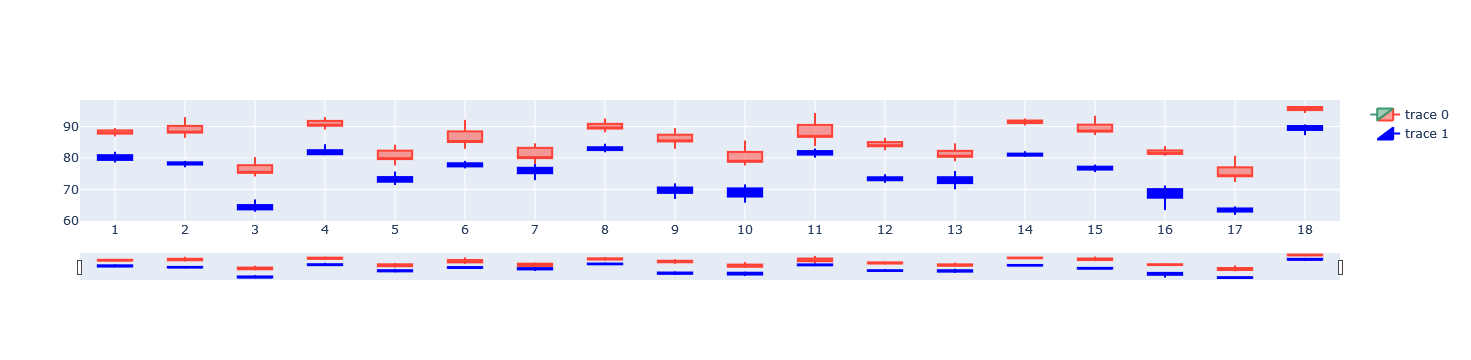

In [23]:

color_hi_fill = 'black'
color_hi_line = 'black'

color_lo_fill = 'blue'
color_lo_line = 'blue'

# fig.data[0].increasing.fillcolor = color_hi_fill
# fig.data[0].increasing.line.color = color_hi_line
# fig.data[0].decreasing.fillcolor = 'rgba(0,0,0,0)'
# fig.data[0].decreasing.line.color = 'rgba(0,0,0,0)'

fig.data[1].increasing.fillcolor = 'rgba(0,0,0,0)'
fig.data[1].increasing.line.color = 'rgba(0,0,0,0)'
fig.data[1].decreasing.fillcolor = color_lo_fill
fig.data[1].decreasing.line.color = color_lo_line

fig.show()
save_path = os.path.join('logs', 'tmp', 'val_acc_all_over.png')
fig.write_image(save_path)

In [20]:
np.mean([val for _,val in acc_cont.items()])

85.51894528781042

In [21]:
np.mean([val for _,val in dic_0.items()])

0.756084656715393

In [22]:
np.mean(np.max([val for _,val in acc_cont.items()], axis=1))

88.69320647663541